In [58]:
import cv2
import numpy as np

In [59]:
# Load YOLOv3 model
weights_path = "yolov3.weights"
config_path = "Unconfirmed 357029.crdownload"
names_path = "coco.names"

In [60]:
import os
print(os.path.exists(config_path))  # Should return True
print(os.path.exists(weights_path))  # Should return True


True
True


In [61]:
# Load class labels
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

In [62]:
# Load YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [63]:
# Load image
image_path = "/content/ai-generated-cat-and-dog-together-with-happy-expressions-on-yellow-background-ai-generated-photo.jpg"  # Change this to your image path
image = cv2.imread(image_path)
height, width = image.shape[:2]

In [64]:
# Convert image to blob
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [65]:
# Get layer names and output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

In [66]:
print("Output Layers:", output_layers)


Output Layers: ['yolo_82', 'yolo_94', 'yolo_106']


In [67]:
# Forward pass
layer_outputs = net.forward(output_layers)

In [68]:
# Initialize lists
boxes, confidences, class_ids = [], [], []

In [69]:
# Process each detection
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.3:  # Confidence threshold
            box = detection[:4] * np.array([width, height, width, height])
            center_x, center_y, w, h = box.astype("int")

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [70]:
print(f"Detected {len(boxes)} objects before NMS")

Detected 9 objects before NMS


In [71]:
# Apply Non-Maximum Suppression (NMS)
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.2)

In [72]:
print(f"Final {len(indices)} objects after NMS")

Final 2 objects after NMS


In [73]:
# Draw bounding boxes
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

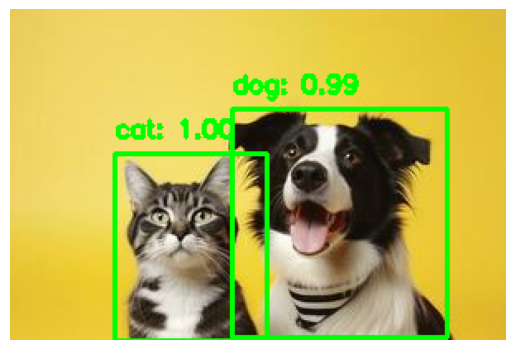

In [74]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis
plt.show()